# setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.7 MB/s eta 0:00:00


In [ ]:
import pickle
import numpy as np
from google.colab import files

import umap
import matplotlib.pyplot as plt

# load weight mats

In [ ]:
# Define the path to your pickle file in Google Drive
file_path = '/content/drive/MyDrive/ts_1L_21M_Wdec_df32768.pkl'  # Change the path if necessary

# Load the weight matrix from the pickle file
with open(file_path, 'rb') as f:
    weight_matrix_np = pickle.load(f)

# Optionally, check the shape of the loaded weight matrix
print(weight_matrix_np.shape)

torch.Size([32768, 1024])


In [ ]:
weight_matrix_np = weight_matrix_np.detach().numpy()

In [ ]:
# Define the path to your pickle file in Google Drive
file_path = '/content/drive/MyDrive/ts_2L_33M_Wdec_df32768.pkl'  # Change the path if necessary

# Load the weight matrix from the pickle file
with open(file_path, 'rb') as f:
    weight_matrix_2 = pickle.load(f)

# Optionally, check the shape of the loaded weight matrix
print(weight_matrix_2.shape)

torch.Size([32768, 1024])


In [ ]:
weight_matrix_2 = weight_matrix_2.detach().numpy()

# load sae f actvs

In [69]:
file_path = '/content/drive/MyDrive/fActs_ts_1L_21M_anySamps__df-32768_v1.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_A = pickle.load(f)

In [70]:
file_path = '/content/drive/MyDrive/fActs_ts_2L_33M_df_32768_anySamps_v1.pkl'
with open(file_path, 'rb') as f:
    feature_acts_model_B = pickle.load(f)

In [71]:
feature_acts_model_B.shape

torch.Size([500, 128, 32768])

In [72]:
first_dim_reshaped = feature_acts_model_A.shape[0] * feature_acts_model_A.shape[1]
reshaped_activations_A = feature_acts_model_A.reshape(first_dim_reshaped, feature_acts_model_A.shape[-1]).cpu()
reshaped_activations_B = feature_acts_model_B.reshape(first_dim_reshaped, feature_acts_model_B.shape[-1]).cpu()

In [73]:
reshaped_activations_B.shape

torch.Size([64000, 32768])

# load feature labels

In [ ]:
import json
with open('feature_top_samps_lst_1L.json', 'rb') as f:
    feat_snip_dict = json.load(f)

In [ ]:
with open('feature_top_samps_lst_2L_MLP0.json', 'rb') as f:
    feat_snip_dict_2 = json.load(f)

In [ ]:
import re

def extract_tagged_word(s):
    # Define the regex pattern to match the tagged word
    pattern = r'\[bold u dark_orange\](.*?)\[/\]'

    # Search for the pattern in the string
    match = re.search(pattern, s)

    # If a match is found, return the captured group (the word inside the tags)
    if match:
        return match.group(1)
    else:
        return None

In [ ]:
fList_model_A = []
for feat_dict in feat_snip_dict:
    # text = feat_dict['strings'][0]
    # result = extract_tagged_word(text)
    # fList_model_A.append(result)
    out_str = ''
    for text in feat_dict['strings']:
        result = extract_tagged_word(text)
        out_str += result + ', '
    fList_model_A.append(out_str)

In [ ]:
fList_model_B = []
for feat_dict in feat_snip_dict_2:
    out_str = ''
    for text in feat_dict['strings']:
        result = extract_tagged_word(text)
        out_str += result + ', '
    fList_model_B.append(out_str)

# umap

In [ ]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='euclidean')

# Fit and transform the data by rows
embedding1 = reducer.fit_transform(weight_matrix_np)
embedding2 = reducer.fit_transform(weight_matrix_2)

In [ ]:
with open('embedding1.pkl', 'wb') as f:
    pickle.dump(embedding1, f)
files.download('embedding1.pkl')

with open('embedding2.pkl', 'wb') as f:
    pickle.dump(embedding2, f)
files.download('embedding2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## load

In [ ]:
import pickle
with open('embedding1.pkl', 'rb') as f:
    embedding1 = pickle.load(f)
with open('embedding2.pkl', 'rb') as f:
    embedding2 = pickle.load(f)

# load corr

only load if obtained corr in cells below already

In [ ]:
# import pickle
# with open('highest_correlations_indices_v1.pkl', 'rb') as f:
#     highest_correlations_indices = pickle.load(f)
# with open('highest_correlations_values_v1.pkl', 'rb') as f:
#     highest_correlations_values = pickle.load(f)

# corr mat

## free memory

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
del feature_acts_model_A
del feature_acts_model_B

In [ ]:
import gc
gc.collect()

0

## get all actv corrs

In [ ]:
# import torch
# import numpy as np

# def top_ind_from_B(ind, reshaped_activations_A, reshaped_activations_B):
#     # Select a column from matrix B
#     column_A = reshaped_activations_B[:, ind]

#     # Ensure tensors are on GPU
#     if torch.cuda.is_available():
#         reshaped_activations_A = reshaped_activations_A.to('cuda')
#         reshaped_activations_B = reshaped_activations_B.to('cuda')
#         column_A = column_A.to('cuda')

#     # Calculate means and standard deviations
#     mean_A = column_A.mean()
#     std_A = column_A.std()

#     # Mask columns with zero standard deviation
#     std_B = reshaped_activations_A.std(dim=0)
#     valid_columns_mask = std_B != 0

#     # Compute correlations for valid columns
#     valid_reshaped_activations_A = reshaped_activations_A[:, valid_columns_mask]
#     mean_B = valid_reshaped_activations_A.mean(dim=0)
#     std_B = valid_reshaped_activations_A.std(dim=0)

#     covariance = ((valid_reshaped_activations_A - mean_B) * (column_A - mean_A).unsqueeze(1)).mean(dim=0)
#     correlations = covariance / (std_A * std_B)

#     # Fill correlations with -inf where columns were invalid
#     all_correlations = torch.full((reshaped_activations_A.shape[1],), float('-inf')).to(correlations.device)
#     all_correlations[valid_columns_mask] = correlations

#     # Get the indices of the top 10 columns in B with the highest correlations
#     top_10_indices = torch.topk(all_correlations, 1).indices.cpu().numpy()
#     top_10_correlations = all_correlations[top_10_indices].cpu().numpy()

#     return top_10_indices, top_10_correlations

In [ ]:
import torch

def find_all_highest_correlations(reshaped_activations_A, reshaped_activations_B, batch_size=1024):
    # Ensure tensors are on GPU
    if torch.cuda.is_available():
        reshaped_activations_A = reshaped_activations_A.to('cuda', dtype=torch.float16)
        reshaped_activations_B = reshaped_activations_B.to('cuda', dtype=torch.float16)

    # Normalize columns of A
    mean_A = reshaped_activations_A.mean(dim=0, keepdim=True)
    std_A = reshaped_activations_A.std(dim=0, keepdim=True)
    normalized_A = (reshaped_activations_A - mean_A) / (std_A + 1e-8)  # Avoid division by zero

    # Normalize columns of B
    mean_B = reshaped_activations_B.mean(dim=0, keepdim=True)
    std_B = reshaped_activations_B.std(dim=0, keepdim=True)
    normalized_B = (reshaped_activations_B - mean_B) / (std_B + 1e-8)  # Avoid division by zero

    # Determine the number of batches
    num_batches = (normalized_A.shape[1] + batch_size - 1) // batch_size  # Round up division

    highest_correlations_values = torch.full((normalized_B.shape[1],), float('-inf'), device=normalized_B.device, dtype=torch.float16)
    highest_correlations_indices = torch.full((normalized_B.shape[1],), -1, device=normalized_B.device, dtype=torch.long)

    # Process in batches
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, normalized_A.shape[1])

        # Compute the correlation for the current batch
        correlation_matrix_batch = torch.matmul(normalized_A[:, start_idx:end_idx].t(), normalized_B) / normalized_A.shape[0]

        # Handle NaNs by setting them to -inf
        correlation_matrix_batch = torch.where(torch.isnan(correlation_matrix_batch), torch.tensor(float('-inf')).to(correlation_matrix_batch.device), correlation_matrix_batch)

        # Compare and update the highest correlation values and indices
        batch_values, batch_indices = correlation_matrix_batch.max(dim=0)
        mask = batch_values > highest_correlations_values
        highest_correlations_values[mask] = batch_values[mask]
        highest_correlations_indices[mask] = batch_indices[mask] + start_idx

    # Move results back to CPU
    highest_correlations_indices = highest_correlations_indices.cpu().numpy()
    highest_correlations_values = highest_correlations_values.cpu().numpy()

    return highest_correlations_indices, highest_correlations_values


In [ ]:
# import torch

# def remove_outliers(tensor, threshold=3.0):
#     mean = tensor.mean(dim=0, keepdim=True)
#     std = tensor.std(dim=0, keepdim=True)
#     z_scores = (tensor - mean) / (std + 1e-8)  # Avoid division by zero
#     mask = torch.abs(z_scores) < threshold
#     return tensor * mask + mean * (~mask)

# def find_all_highest_correlations(reshaped_activations_A, reshaped_activations_B, batch_size=1024):
#     # Ensure tensors are on GPU
#     if torch.cuda.is_available():
#         reshaped_activations_A = reshaped_activations_A.to('cuda', dtype=torch.float16)
#         reshaped_activations_B = reshaped_activations_B.to('cuda', dtype=torch.float16)

#     # Remove outliers in A and B
#     reshaped_activations_A = remove_outliers(reshaped_activations_A)
#     reshaped_activations_B = remove_outliers(reshaped_activations_B)

#     # Normalize columns of A
#     mean_A = reshaped_activations_A.mean(dim=0, keepdim=True)
#     std_A = reshaped_activations_A.std(dim=0, keepdim=True)
#     normalized_A = (reshaped_activations_A - mean_A) / (std_A + 1e-8)  # Avoid division by zero

#     # Normalize columns of B
#     mean_B = reshaped_activations_B.mean(dim=0, keepdim=True)
#     std_B = reshaped_activations_B.std(dim=0, keepdim=True)
#     normalized_B = (reshaped_activations_B - mean_B) / (std_B + 1e-8)  # Avoid division by zero

#     # Determine the number of batches
#     num_batches = (normalized_A.shape[1] + batch_size - 1) // batch_size  # Round up division

#     highest_correlations_values = torch.full((normalized_B.shape[1],), float('-inf'), device=normalized_B.device, dtype=torch.float16)
#     highest_correlations_indices = torch.full((normalized_B.shape[1],), -1, device=normalized_B.device, dtype=torch.long)

#     # Process in batches
#     for i in range(num_batches):
#         start_idx = i * batch_size
#         end_idx = min((i + 1) * batch_size, normalized_A.shape[1])

#         # Compute the correlation for the current batch
#         correlation_matrix_batch = torch.matmul(normalized_A[:, start_idx:end_idx].t(), normalized_B) / normalized_A.shape[0]

#         # Handle NaNs by setting them to -inf
#         correlation_matrix_batch = torch.where(torch.isnan(correlation_matrix_batch), torch.tensor(float('-inf'), device=correlation_matrix_batch.device), correlation_matrix_batch)

#         # Compare and update the highest correlation values and indices
#         batch_values, batch_indices = correlation_matrix_batch.max(dim=0)
#         mask = batch_values > highest_correlations_values
#         highest_correlations_values[mask] = batch_values[mask]
#         highest_correlations_indices[mask] = batch_indices[mask] + start_idx

#     # Move results back to CPU
#     highest_correlations_indices = highest_correlations_indices.cpu().numpy()
#     highest_correlations_values = highest_correlations_values.cpu().numpy()

#     return highest_correlations_indices, highest_correlations_values

In [ ]:
highest_correlations_indices, highest_correlations_values = find_all_highest_correlations(reshaped_activations_A, reshaped_activations_B)
print(f'Highest correlations indices: {len(highest_correlations_indices)}')
print(f'Highest correlations values: {len(highest_correlations_values)}')

Highest correlations indices: 32768
Highest correlations values: 32768


In [ ]:
highest_correlations_indices[:100]

array([17153,    -1,  3066, 10491, 22235, 17155,    -1,  5181, 15844,
       25662, 15373, 16949, 12697, 30934, 29748, 16716, 14967,   444,
       32321, 28982,  3671,  9130,    -1, 17062,  8745, 24233, 10092,
       23204, 19841,    -1, 11764, 31705,  3630, 12296, 10188,   512,
       29418, 15647,    -1,  3440,    -1, 26478, 22892, 14477, 17452,
        1646,    -1, 30050, 26311,  2487, 21727, 32076, 22846,  6758,
       18825, 15460, 31849, 14017, 19290, 29752,   381, 18488, 16656,
       26001, 11091, 18908,  3638, 20424,    18, 25260, 17004, 14917,
        1877,  1919, 22094,    -1,  3177,  6471, 18209, 10685, 24541,
          -1,  9176, 32186,  5003,    -1, 20383,   915,  9054, 22355,
       17342,    -1, 29321, 14077,  8431,  8497,  8807, 13469,  9697,
       20188])

In [ ]:
highest_correlations_values[:100]

array([0.1677,   -inf, 0.2412, 0.482 , 0.165 , 0.985 ,   -inf, 0.303 ,
       0.7305, 0.3037, 0.307 , 0.267 , 0.2583, 0.1594, 0.948 , 0.2856,
       0.4668, 0.738 , 0.1755, 0.5337, 0.4836, 0.4707,   -inf, 0.41  ,
       0.305 , 0.785 , 0.5337, 0.3918, 0.7085,   -inf, 0.4631, 0.3516,
       0.235 , 0.2744, 0.3862, 0.2495, 0.1506, 0.2448,   -inf, 0.3354,
         -inf, 0.1887, 0.2615, 0.369 , 0.641 , 0.5894,   -inf, 0.3582,
       0.5234, 0.3606, 0.369 , 0.917 , 0.3992, 0.291 , 0.243 , 0.997 ,
       0.4832, 0.576 , 0.582 , 0.284 , 0.251 , 0.1417, 0.6133, 0.7324,
       0.6597, 0.3774, 0.282 , 0.5186, 0.739 , 0.4456, 0.66  , 0.4744,
       0.3845, 0.2223, 0.297 ,   -inf, 0.3909, 0.283 , 0.525 , 0.2169,
       0.301 ,   -inf, 0.4348, 0.852 , 0.1093,   -inf, 0.2883, 0.2705,
       0.1073, 0.5967, 0.1858,   -inf, 0.275 , 0.1351, 0.1027, 0.9995,
       0.2886, 0.313 , 0.3384, 0.2002], dtype=float16)

### save corrs

In [ ]:
with open('highest_correlations_indices_v1.pkl', 'wb') as f:
    pickle.dump(highest_correlations_indices, f)
with open('highest_correlations_values_v1.pkl', 'wb') as f:
    pickle.dump(highest_correlations_values, f)

In [ ]:
files.download('highest_correlations_indices_v1.pkl')
files.download('highest_correlations_values_v1.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !cp batch_tokens_anySamps_v1.pkl /content/drive/MyDrive/

# load tokenizer

In [ ]:
from transformers import AutoTokenizer

# Load the tokenizer for the specified model
tokenizer = AutoTokenizer.from_pretrained("roneneldan/TinyStories-1Layer-21M")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

# interpret paired features

## load dataset tokens

In [ ]:
import pickle
file_path = '/content/drive/MyDrive/batch_tokens_anySamps_v1.pkl'
with open(file_path, 'rb') as f:
    batch_tokens = pickle.load(f)

## interpret

In [ ]:
%pip install jaxtyping

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.2 MB/s eta 0:00:00


In [ ]:
import torch
from torch import nn, Tensor
from jaxtyping import Float, Int
from typing import Optional, Callable, Union, List, Tuple

In [66]:
def highest_activating_tokens(
    feature_acts,
    feature_idx: int,
    k: int = 10,  # num batch_seq samples
    batch_tokens=None
) -> Tuple[Int[Tensor, "k 2"], Float[Tensor, "k"]]:
    '''
    Returns the indices & values for the highest-activating tokens in the given batch of data.
    '''
    batch_size, seq_len = batch_tokens.shape

    # Get the top k largest activations for only targeted feature
    # need to flatten (batch,seq) into batch*seq first because it's ANY batch_seq, even if in same batch or same pos
    flattened_feature_acts = feature_acts[:, :, feature_idx].reshape(-1)
    # flattened_feature_acts = feature_acts[:, feature_idx]

    top_acts_values, top_acts_indices = flattened_feature_acts.topk(k)
    # top_acts_values should be 1D
    # top_acts_indices should be also be 1D. Now, turn it back to 2D
    # Convert the indices into (batch, seq) indices
    top_acts_batch = top_acts_indices // seq_len
    top_acts_seq = top_acts_indices % seq_len

    return torch.stack([top_acts_batch, top_acts_seq], dim=-1), top_acts_values

In [67]:
from rich import print as rprint
def display_top_sequences(top_acts_indices, top_acts_values, batch_tokens):
    s = ""
    for (batch_idx, seq_idx), value in zip(top_acts_indices, top_acts_values):
        # s += f'{batch_idx}\n'
        s += f'batchID: {batch_idx}, '
        # Get the sequence as a string (with some padding on either side of our sequence)
        seq_start = max(seq_idx - 5, 0)
        seq_end = min(seq_idx + 5, batch_tokens.shape[1])
        seq = ""
        # Loop over the sequence, adding each token to the string (highlighting the token with the large activations)
        for i in range(seq_start, seq_end):
            # new_str_token = model.to_single_str_token(batch_tokens[batch_idx, i].item()).replace("\n", "\\n").replace("<|BOS|>", "|BOS|")
            new_str_token = tokenizer.decode([batch_tokens[batch_idx, i].item()]).replace("\n", "\\n").replace("<|BOS|>", "|BOS|")
            if i == seq_idx:
                new_str_token = f"[bold u dark_orange]{new_str_token}[/]"
            seq += new_str_token
        # Print the sequence, and the activation value
        s += f'Act = {value:.2f}, Seq = "{seq}"\n'

    rprint(s)

In [77]:
samp_m = 5 # get top samp_m tokens for all top feat_k feature neurons

for feature_idx_B, feature_idx_A in enumerate(highest_correlations_indices[:5]):
    print(f'Correlation: {highest_correlations_values[feature_idx_B]}')
    print('Model A Feature: ', feature_idx_A)
    ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(feature_acts_model_A, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    # ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(reshaped_activations_A, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    display_top_sequences(ds_top_acts_indices, ds_top_acts_values, batch_tokens=batch_tokens)

    print('Model B Feature: ', feature_idx_B)
    ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(feature_acts_model_B, feature_idx_B, samp_m, batch_tokens=batch_tokens)
    # ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(reshaped_activations_B, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    display_top_sequences(ds_top_acts_indices, ds_top_acts_values, batch_tokens=batch_tokens)

    print('-'*50)

Correlation: 0.70556640625
Model A Feature:  206


batchID: 463, Act = 2.71, Seq = " time, there were two friends named Timmy and"
batchID: 87, Act = 1.97, Seq = " he saw two birds fighting outside his window"
batchID: 111, Act = 1.74, Seq = " for the nose, two stones for the eyes,"
batchID: 126, Act = 1.47, Seq = ". One day, two fishes"
batchID: 6, Act = 1.17, Seq = " boy, and the two cows all lived happily ever"

Model B Feature:  0


batchID: 87, Act = 6.16, Seq = " he saw two birds fighting outside his window"
batchID: 111, Act = 4.81, Seq = " for the nose, two stones for the eyes,"
batchID: 17, Act = 4.40, Seq = ", the park had two slides for kids to play"
batchID: 126, Act = 4.02, Seq = ". One day, two fishes"
batchID: 127, Act = 3.86, Seq = " came and swept the two fishes away. They were"

--------------------------------------------------
Correlation: -inf
Model A Feature:  -1


batchID: 323, Act = 1.05, Seq = " on the table and the floor. But she did"
batchID: 342, Act = 0.92, Seq = " broke and spilled on the floor.\n\n""
batchID: 146, Act = 0.85, Seq = " over his desk and his drawings. Timmy was"
batchID: 324, Act = 0.69, Seq = " on the table and the floor. We need to"
batchID: 422, Act = 0.62, Seq = " was sticky. There was jam everywhere. She had"

Model B Feature:  1


batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the shiny"
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the"
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the shiny car"
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the shiny car and said"
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the shiny car and"

--------------------------------------------------
Correlation: 0.79736328125
Model A Feature:  30669


batchID: 24, Act = 5.43, Seq = " the man. He ate all the candy. Suddenly"
batchID: 348, Act = 4.30, Seq = " of you. You ate all your vegetables. You"
batchID: 233, Act = 4.10, Seq = " was very happy and ate all the corn.\n"
batchID: 135, Act = 3.12, Seq = "\n\nLily put all the ingredients in a"
batchID: 451, Act = 2.77, Seq = " sister's toys and eat all the cookies. One"

Model B Feature:  2


batchID: 24, Act = 19.82, Seq = " the man. He ate all the candy. Suddenly"
batchID: 233, Act = 19.05, Seq = " was very happy and ate all the corn.\n"
batchID: 348, Act = 18.95, Seq = " of you. You ate all your vegetables. You"
batchID: 451, Act = 15.91, Seq = " sister's toys and eat all the cookies. One"
batchID: 40, Act = 14.83, Seq = " plate. Lily ate them all up and smiled."

--------------------------------------------------
Correlation: 0.3623046875
Model A Feature:  15713


batchID: 179, Act = 3.32, Seq = " that she wanted to turn into a special present for"
batchID: 8, Act = 1.69, Seq = " wanted to get his ball into the goal.\n"
batchID: 216, Act = 0.92, Seq = " raked all the leaves into a big pile."
batchID: 411, Act = 0.66, Seq = " cut the bread and cheese into small pieces. She"
batchID: 54, Act = 0.34, Seq = " down a big hill and into a well.\n"

Model B Feature:  3


batchID: 8, Act = 0.58, Seq = " wanted to get his ball into the goal.\n"
batchID: 106, Act = 0.32, Seq = " goat was getting thirstier. The"
batchID: 366, Act = 0.18, Seq = "."\n\nThey got off their bikes and left"
batchID: 157, Act = 0.03, Seq = ", a clumsy mouse got inside the house and started"
batchID: 0, Act = 0.00, Seq = "Spot. Spot saw the"

--------------------------------------------------
Correlation: 0.806640625
Model A Feature:  17605


batchID: 23, Act = 2.79, Seq = " a strange man. The man said, "I"
batchID: 116, Act = 2.47, Seq = " in his backyard. The cat looked at him and"
batchID: 218, Act = 2.26, Seq = " playing the trumpet. The man played so well that"
batchID: 142, Act = 2.22, Seq = " on a branch. The bird was trying to balance"
batchID: 3, Act = 2.20, Seq = " saw a dog. The dog was big and had"

Model B Feature:  4


batchID: 3, Act = 6.14, Seq = " saw a dog. The dog was big and had"
batchID: 14, Act = 5.83, Seq = " big dog came. The dog saw the orange ball"
batchID: 13, Act = 5.49, Seq = " a girl named Sue. Sue had a pretty doll"
batchID: 116, Act = 5.12, Seq = " in his backyard. The cat looked at him and"
batchID: 331, Act = 5.11, Seq = " saw a cat. The cat was on the road"

--------------------------------------------------


## interpret feats with highest corr

In [75]:
# def get_top_n_correlated_indices(highest_correlations_indices, highest_correlations_values, n=10):
#     # Get the indices of the top n correlation values
#     top_n_indices = np.argsort(highest_correlations_values)[-n:][::-1]

#     # Retrieve the corresponding indices from A and B
#     top_n_indices_A = highest_correlations_indices[top_n_indices]
#     top_n_indices_B = top_n_indices

#     # Retrieve the corresponding top n correlation values
#     top_n_values = highest_correlations_values[top_n_indices]

#     return top_n_indices_A, top_n_indices_B, top_n_values

def get_top_n_correlated_indices(highest_correlations_indices, highest_correlations_values, n=10):
    # Filter out correlation values that are >= 1
    valid_indices = np.where(highest_correlations_values < 0.9)[0]
    filtered_values = highest_correlations_values[valid_indices]
    filtered_indices = highest_correlations_indices[valid_indices]

    # Get the indices of the top n correlation values
    top_n_indices = np.argsort(filtered_values)[-n:][::-1]

    # Retrieve the corresponding indices from A and B
    top_n_indices_A = filtered_indices[top_n_indices]
    top_n_indices_B = valid_indices[top_n_indices]

    # Retrieve the corresponding top n correlation values
    top_n_values = filtered_values[top_n_indices]

    return top_n_indices_A, top_n_indices_B, top_n_values

top_indices_A, top_indices_B, top_values = get_top_n_correlated_indices(highest_correlations_indices, highest_correlations_values, n=10)

for i in range(len(top_values)):
    print(f"Pair {i+1}: Index A = {top_indices_A[i]}, Index B = {top_indices_B[i]}, Correlation Value = {top_values[i]}")

Pair 1: Index A = 28600, Index B = 29149, Correlation Value = 0.8994140625
Pair 2: Index A = 22866, Index B = 13523, Correlation Value = 0.8994140625
Pair 3: Index A = 28074, Index B = 28449, Correlation Value = 0.8994140625
Pair 4: Index A = 29291, Index B = 19223, Correlation Value = 0.8994140625
Pair 5: Index A = 10717, Index B = 18397, Correlation Value = 0.8994140625
Pair 6: Index A = 13933, Index B = 1124, Correlation Value = 0.8994140625
Pair 7: Index A = 17976, Index B = 32167, Correlation Value = 0.8994140625
Pair 8: Index A = 26805, Index B = 7715, Correlation Value = 0.8994140625
Pair 9: Index A = 26797, Index B = 4861, Correlation Value = 0.8994140625
Pair 10: Index A = 15617, Index B = 30228, Correlation Value = 0.8994140625


In [61]:
highest_correlations_indices[6088]

32578

In [62]:
highest_correlations_values[6088]

1.001

In [63]:
fList_model_B[6088]

' ch,  Spot, Spot,  saw, ., '

In [65]:
fList_model_A[32578]

' ch,  Spot, Spot,  saw, ., '

In [76]:
samp_m = 5 # get top samp_m tokens for all top feat_k feature neurons

for feature_idx_A, feature_idx_B in zip(top_indices_A, top_indices_B):
# for feature_idx_B, feature_idx_A in enumerate(highest_correlations_indices[:3]):
    # print(f'Correlation: {highest_correlations_values[feature_idx_B]}')
    print(f'Correlation: {highest_correlations_values[feature_idx_B]}')
    print('Model A Feature: ', feature_idx_A)
    ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(feature_acts_model_A, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    # ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(reshaped_activations_A, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    display_top_sequences(ds_top_acts_indices, ds_top_acts_values, batch_tokens=batch_tokens)

    print('Model B Feature: ', feature_idx_B)
    ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(feature_acts_model_B, feature_idx_B, samp_m, batch_tokens=batch_tokens)
    # ds_top_acts_indices, ds_top_acts_values = highest_activating_tokens(reshaped_activations_B, feature_idx_A, samp_m, batch_tokens=batch_tokens)
    display_top_sequences(ds_top_acts_indices, ds_top_acts_values, batch_tokens=batch_tokens)

    print('-'*50)

Correlation: 0.8994140625
Model A Feature:  28600


batchID: 70, Act = 3.39, Seq = " that it's important to be true to yourself and"
batchID: 97, Act = 3.38, Seq = " that it's better to be grateful for what you"
batchID: 475, Act = 3.37, Seq = " that it's important to be kind and not take"
batchID: 29, Act = 3.15, Seq = " that it is important to be clean. And all"
batchID: 200, Act = 3.07, Seq = ": it's important to be careful and stay safe"

Model B Feature:  29149


batchID: 291, Act = 10.84, Seq = " lesson. They learned to be careful, and to"
batchID: 475, Act = 10.71, Seq = " that it's important to be kind and not take"
batchID: 5, Act = 10.67, Seq = " the story is to always be thoughtful and careful when"
batchID: 29, Act = 10.56, Seq = " that it is important to be clean. And all"
batchID: 96, Act = 10.49, Seq = " that it's important to be careful with fragile things"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  22866


batchID: 256, Act = 3.91, Seq = " and crunchy. It makes you grow and learn"
batchID: 179, Act = 3.31, Seq = " was worth it because it made her room look pretty"
batchID: 49, Act = 3.00, Seq = " and help people. It makes me feel good.""
batchID: 488, Act = 2.45, Seq = " and smelled it. It made her cry because it"
batchID: 442, Act = 2.35, Seq = " like the rain because it made her wet and cold"

Model B Feature:  13523


batchID: 256, Act = 10.42, Seq = " and crunchy. It makes you grow and learn"
batchID: 341, Act = 8.11, Seq = "icked their hands. It made them laugh.\n"
batchID: 405, Act = 7.46, Seq = " on the floor. It makes a loud noise."
batchID: 383, Act = 6.77, Seq = " your pocket. It will make a mess."\n"
batchID: 49, Act = 6.66, Seq = " and help people. It makes me feel good.""

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  28074


batchID: 384, Act = 1.11, Seq = ". And I have some buttons and a carrot.""
batchID: 404, Act = 1.07, Seq = " It is old and has buttons and a cord."
batchID: 385, Act = 0.85, Seq = " neck. They used the buttons for the eyes and"
batchID: 355, Act = 0.74, Seq = " small toy car with a zipper on it. He"
batchID: 325, Act = 0.48, Seq = " envelope and write grandma's address. Then we will"

Model B Feature:  28449


batchID: 384, Act = 9.66, Seq = ". And I have some buttons and a carrot.""
batchID: 404, Act = 9.05, Seq = " It is old and has buttons and a cord."
batchID: 385, Act = 7.81, Seq = " neck. They used the buttons for the eyes and"
batchID: 355, Act = 1.89, Seq = " small toy car with a zipper on it. He"
batchID: 404, Act = 0.92, Seq = " and has buttons and a cord. Lily wants to"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  29291


batchID: 18, Act = 3.44, Seq = " give the cake to her best friend. At the"
batchID: 17, Act = 3.13, Seq = " yummy cake for her best friend's birthday."
batchID: 108, Act = 2.25, Seq = " was her best friend. One day"
batchID: 240, Act = 1.95, Seq = " Lily. She had a best friend named Timmy"
batchID: 159, Act = 0.84, Seq = " up and keep trying his best.Once upon a"

Model B Feature:  19223


batchID: 18, Act = 9.96, Seq = " give the cake to her best friend. At the"
batchID: 17, Act = 9.50, Seq = " yummy cake for her best friend's birthday."
batchID: 159, Act = 8.20, Seq = " up and keep trying his best.Once upon a"
batchID: 240, Act = 4.20, Seq = " Lily. She had a best friend named Timmy"
batchID: 108, Act = 2.21, Seq = " was her best friend. One day"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  10717


batchID: 263, Act = 6.63, Seq = " the bathtub. She climbed on a stool and"
batchID: 381, Act = 6.52, Seq = " and a spoon. He climbs on the chair and"
batchID: 351, Act = 6.38, Seq = " to have one. She climbed the tree and reached"
batchID: 369, Act = 6.10, Seq = " and his mom. They climbed up the ladder and"
batchID: 55, Act = 5.94, Seq = " get his ball. He climbed down into the well"

Model B Feature:  18397


batchID: 369, Act = 9.40, Seq = " and his mom. They climbed up the ladder and"
batchID: 263, Act = 9.09, Seq = " the bathtub. She climbed on a stool and"
batchID: 55, Act = 8.45, Seq = " get his ball. He climbed down into the well"
batchID: 381, Act = 8.44, Seq = " and a spoon. He climbs on the chair and"
batchID: 48, Act = 8.30, Seq = " march on it. They climbed up and down the"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  13933


batchID: 374, Act = 4.18, Seq = " their house. The field has many flowers and bugs"
batchID: 161, Act = 2.99, Seq = ". Timmy's bike had gears that made it"
batchID: 401, Act = 2.88, Seq = " a tree. The hive had many bees and honey"
batchID: 17, Act = 2.74, Seq = ". Now, the park had two slides for kids"
batchID: 45, Act = 2.36, Seq = " their jog in the park had led them to help"

Model B Feature:  1124


batchID: 374, Act = 8.28, Seq = " their house. The field has many flowers and bugs"
batchID: 401, Act = 5.63, Seq = " a tree. The hive had many bees and honey"
batchID: 430, Act = 3.85, Seq = " who lived on the farm had a naughty horse who"
batchID: 45, Act = 3.75, Seq = " their jog in the park had led them to help"
batchID: 17, Act = 3.45, Seq = ". Now, the park had two slides for kids"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  17976


batchID: 49, Act = 6.53, Seq = " thought about what Puff said. The next day"
batchID: 394, Act = 5.80, Seq = " and did what the farmer said. They learned their"
batchID: 388, Act = 5.66, Seq = " everyone should do what he said.\n\nOne"
batchID: 97, Act = 4.31, Seq = " Lily remembered what her mom said about fragile things."
batchID: 451, Act = 4.04, Seq = " and remembered what his mother said: "If you"

Model B Feature:  32167


batchID: 451, Act = 14.09, Seq = " and remembered what his mother said: "If you"
batchID: 97, Act = 13.30, Seq = " Lily remembered what her mom said about fragile things."
batchID: 489, Act = 12.99, Seq = " did what her mom said and it worked!"
batchID: 394, Act = 10.12, Seq = " and did what the farmer said. They learned their"
batchID: 49, Act = 9.14, Seq = " thought about what Puff said. The next day"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  26805


batchID: 411, Act = 2.51, Seq = " book, a chalk and a board. She showed"
batchID: 404, Act = 2.25, Seq = " old and has buttons and a cord. Lily wants"
batchID: 356, Act = 2.19, Seq = " big bottle of soap and a wand. They blew"
batchID: 395, Act = 2.02, Seq = " has a long string and a tail. It is"
batchID: 260, Act = 1.95, Seq = " It has a bow and a tag. The tag"

Model B Feature:  7715


batchID: 280, Act = 9.08, Seq = " car, a flower and a star."
batchID: 393, Act = 8.48, Seq = " with a big dent and a broken window. He"
batchID: 281, Act = 8.37, Seq = " car, a flower and a star. They were"
batchID: 300, Act = 8.36, Seq = " has a red light and a number. The number"
batchID: 384, Act = 7.70, Seq = " a nose and eyes and a mouth."\n\n"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  26797


batchID: 287, Act = 4.07, Seq = " sharp, and they pretended it was a treasure."
batchID: 335, Act = 3.62, Seq = " open the umbrella and pretend it is a tent."
batchID: 359, Act = 1.39, Seq = ". Lily likes to pretend that Anna is a princess"
batchID: 359, Act = 1.23, Seq = " Lily likes to pretend that Anna is a princess who"
batchID: 360, Act = 0.73, Seq = "Lily makes a pretend cake and tea with her"

Model B Feature:  4861


batchID: 287, Act = 6.42, Seq = " sharp, and they pretended it was a treasure."
batchID: 335, Act = 4.59, Seq = " open the umbrella and pretend it is a tent."
batchID: 374, Act = 2.11, Seq = ". Tommy listened and imagined the adventure. He forgot"
batchID: 374, Act = 0.67, Seq = " Tommy listened and imagined the adventure. He forgot about"
batchID: 150, Act = 0.65, Seq = " as the actors on stage pretended to be different characters"

--------------------------------------------------
Correlation: 0.8994140625
Model A Feature:  15617


batchID: 79, Act = 4.19, Seq = " for a walk and they passed by a big factory"
batchID: 203, Act = 2.84, Seq = " too late. Max had passed away. Lily was"
batchID: 249, Act = 2.60, Seq = " she thought she saw it pass by the tree."
batchID: 431, Act = 1.75, Seq = ". \n\nDays passed and Lily forgot about"
batchID: 447, Act = 1.57, Seq = "\n\nHours passed and Lily started to"

Model B Feature:  30228


batchID: 203, Act = 20.69, Seq = " too late. Max had passed away. Lily was"
batchID: 431, Act = 18.75, Seq = ". \n\nDays passed and Lily forgot about"
batchID: 79, Act = 18.52, Seq = " for a walk and they passed by a big factory"
batchID: 447, Act = 16.85, Seq = "\n\nHours passed and Lily started to"
batchID: 249, Act = 5.93, Seq = " she thought she saw it pass by the tree."

--------------------------------------------------


## plot feature actv corrs

In [ ]:
import matplotlib.pyplot as plt

0.9995227048582573


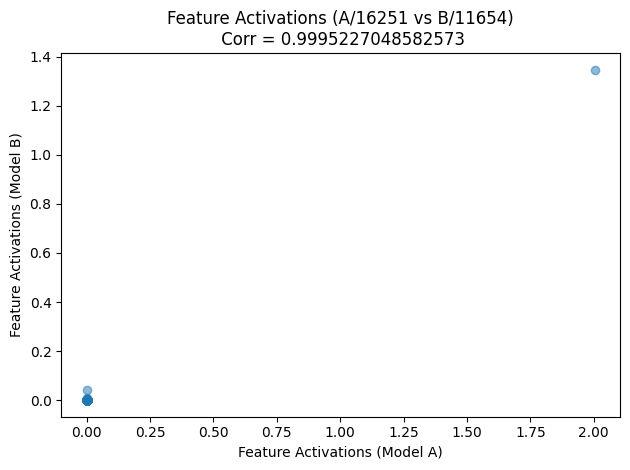

In [ ]:
model_A_f_ind = 32055
model_B_f_ind = 25723

feature_0_actvs_A = reshaped_activations_A[:, model_A_f_ind].numpy()
feature_0_actvs_B = reshaped_activations_B[:, model_B_f_ind].numpy()

corr = np.corrcoef(feature_0_actvs_A, feature_0_actvs_B)[0, 1]
print(corr)

plt.scatter(feature_0_actvs_A, feature_0_actvs_B, alpha=0.5)

plt.xlabel('Feature Activations (Model A)')
plt.ylabel('Feature Activations (Model B)')
plt.title('Feature Activations (A/16251 vs B/11654)\n Corr = ' + str(corr))

plt.tight_layout()
plt.show()

0.6991774323758191


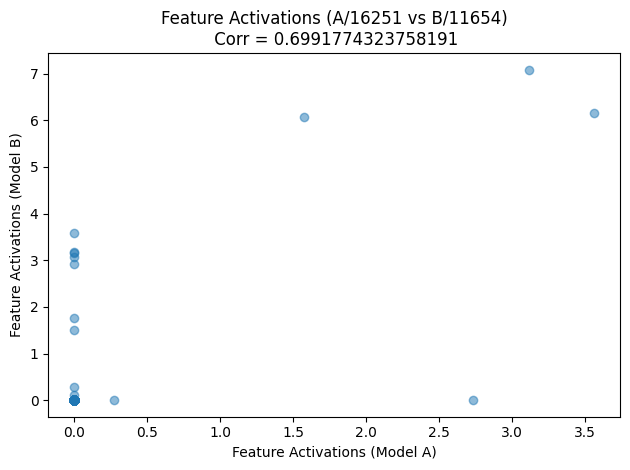

In [51]:
model_A_f_ind = 27935
model_B_f_ind = 22040

feature_0_actvs_A = reshaped_activations_A[:, model_A_f_ind].numpy()
feature_0_actvs_B = reshaped_activations_B[:, model_B_f_ind].numpy()

corr = np.corrcoef(feature_0_actvs_A, feature_0_actvs_B)[0, 1]
print(corr)

plt.scatter(feature_0_actvs_A, feature_0_actvs_B, alpha=0.5)

plt.xlabel('Feature Activations (Model A)')
plt.ylabel('Feature Activations (Model B)')
plt.title('Feature Activations (A/16251 vs B/11654)\n Corr = ' + str(corr))

plt.tight_layout()
plt.show()

0.6993053028225114


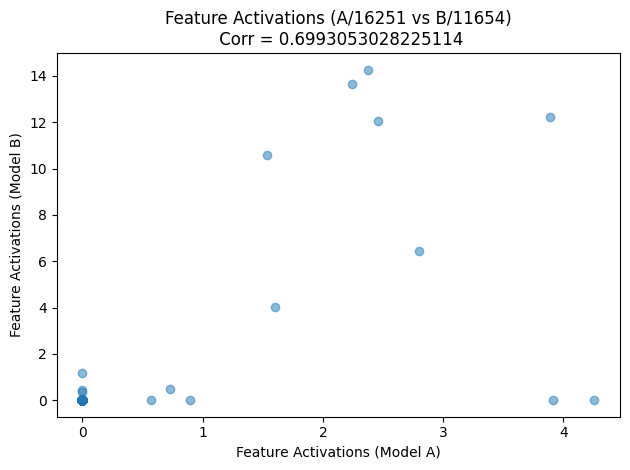

In [52]:
model_A_f_ind = 15556
model_B_f_ind = 18992

feature_0_actvs_A = reshaped_activations_A[:, model_A_f_ind].numpy()
feature_0_actvs_B = reshaped_activations_B[:, model_B_f_ind].numpy()

corr = np.corrcoef(feature_0_actvs_A, feature_0_actvs_B)[0, 1]
print(corr)

plt.scatter(feature_0_actvs_A, feature_0_actvs_B, alpha=0.5)

plt.xlabel('Feature Activations (Model A)')
plt.ylabel('Feature Activations (Model B)')
plt.title('Feature Activations (A/16251 vs B/11654)\n Corr = ' + str(corr))

plt.tight_layout()
plt.show()

# search modB features with keyword, get modA f pair

ISSUE WITH SEARCH: ‘king’ appears to be part of ‘talking’, etc

In [ ]:
def find_indices_with_keyword(fList, keyword):
    """
    Find all indices of fList which contain the keyword in the string at those indices.

    Args:
    fList (list of str): List of strings to search within.
    keyword (str): Keyword to search for within the strings of fList.

    Returns:
    list of int: List of indices where the keyword is found within the strings of fList.
    """
    index_list = []
    for index, string in enumerate(fList):
        split_list = string.split(',')
        no_space_list = [i.replace(' ', '').lower() for i in split_list]
        if keyword in no_space_list:
            index_list.append(index)
    return index_list

def get_values_from_indices(indices, values_list):
    """
    Get the values from values_list at the specified indices.

    Args:
    indices (list of int): List of indices to retrieve values from.
    values_list (list): List of values from which to retrieve the specified indices.

    Returns:
    list: List of values from values_list at the specified indices.
    """
    return [values_list[index] for index in indices]

keyword = "upon"
modB_feats = find_indices_with_keyword(fList_model_B, keyword)
modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices)
print(modA_feats)
print(modB_feats)

[29104, 26862, 28774, 23469, 26463, 32192, 28774, 28648, 20187, 18408, 32192, 27539, 20307, 27539, 10928, 28774, 11863, 27924, 28856, 20995, 18408, 32192, 18408, 10928, 13098, 10928, 32557, 10928, 5240, 32557, 32192, 20187, 18408, 20307, 28774, 20187, 20187, 18408, 28774, 10928, 27539, 5240, 32557, 32557, 32557, 7374, 10928, 18408, 32557, 10928, 2891, 32557, 28575, 32557, 27539, 18408, 32557, 120, 3973, 32557, 32557, 18408, 18408, 26192, 27539, 32557, 32557, 28774, 20187, 18408, 32557, 32192, 19853, 32192, 32557, 18408, 120, 32557, 32557, 28856, 10928, 18408, 32557, 32192, 10928, 32557, 19195, 18408, 32557, 32557, 18408, 16397, 28774, 32557, 120, 32192, 28774, 20187, 10928, 32557, 23953, 18408, 15667, 32557, 8074, 18408, 10928, 21985, 18481]
[377, 955, 1757, 1780, 2132, 2429, 2512, 2954, 3753, 3984, 6103, 6119, 6517, 6645, 6775, 7192, 7236, 9027, 9430, 10224, 10587, 10683, 10804, 10991, 11029, 11619, 11800, 12178, 12417, 12948, 13079, 13223, 13232, 13629, 14121, 14178, 14735, 14814, 15

In [ ]:
keyword = "king"
modB_feats = find_indices_with_keyword(fList_model_B, keyword)
modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices)
print(modA_feats)
print(modB_feats)

[30967, 18081, 13482, 26019, 17449, 30967]
[5920, 8263, 11726, 20328, 20582, 20605]


In [ ]:
print(fList_model_A[30967])
print(fList_model_B[5920])

 king,  queen,  queen,  king,  judge, 
 king,  king,  leader,  queen,  judge, 


In [ ]:
keyword = "spot"
modB_feats = find_indices_with_keyword(fList_model_B, keyword)
modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices)
print(modA_feats)
print(modB_feats)

[-1, 15713, -1, -1, -1, -1, -1, -1, 4350, -1, -1, -1, -1, 17521, -1, -1, 3191, 9658, -1, -1, -1, 32701, -1, 3705, -1, -1, 25220, 4623, -1, 29726, -1, 30494, 10101, 29950, -1, 24168, 8508, -1, -1, -1, -1, -1, -1, -1, -1, 16370, -1, -1, -1, -1, -1, 8946, 10328, -1, -1, 2877, -1, 15856, -1, -1, 20725, -1, -1, -1, 7051, -1, -1, 10615, -1, -1, -1, 21801, 7994, -1, 10967, 20518, -1, 27473, -1, -1, -1, -1, -1, 32060, 5671, -1, 23029, -1, 18598, -1, -1, 10635, -1, -1, -1, -1, 20536, -1, 1051, -1, -1, 19269, -1, -1, -1, -1, 9511, -1, 945, -1, -1, -1, -1, -1, -1, 25446, -1, -1, 18681, -1, 18892, -1, 20525, 14461, -1, -1, -1, -1, -1, -1, 20548, -1, -1, 28134, 24925, -1, -1, -1, -1, 31239, 16328, -1, -1, -1, -1, -1, -1, 30151, -1, 23868, 9409, -1, -1, -1, -1, -1, -1, -1, -1, -1, 11275, -1, -1, -1, -1, 11430, -1, 28745, -1, -1, -1, 31454, -1, -1, -1, -1, -1, -1, 28247, -1, 25021, 20086, 11848, -1, 1748, -1, 11793, -1, -1, -1, -1, 11254, 26086, 12539, 3315, -1, -1, -1, -1, -1, 18824, -1, -1, 15537, 

In [ ]:
print(fList_model_A[15713])
print(fList_model_B[3])

 into,  into,  into,  into,  into, 
 into,  getting,  off,  inside, Spot, 


# statically color points on 2 plots

## search and plot fn

In [ ]:
import umap
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

def keyword_umaps(keyword, embedding1, embedding2, fList_model_A, fList_model_B, highest_correlations_indices_v1):
    modB_feats = find_indices_with_keyword(fList_model_B, keyword)
    modA_feats = get_values_from_indices(modB_feats, highest_correlations_indices_v1)

    df1 = pd.DataFrame(embedding1, columns=['UMAP Component 1', 'UMAP Component 2'])
    df1['Feature ID'] = range(len(embedding1))
    df1['Feature Description'] = fList_model_A[:len(embedding1)]
    df1['Color'] = ['red' if i in modA_feats else 'blue' for i in df1['Feature ID']]

    df2 = pd.DataFrame(embedding2, columns=['UMAP Component 1', 'UMAP Component 2'])
    df2['Feature ID'] = range(len(embedding2))
    df2['Feature Description'] = fList_model_B[:len(embedding2)]
    df2['Color'] = ['red' if i in modB_feats else 'blue' for i in df2['Feature ID']]

    # Create side by side plots using Plotly subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('UMAP Projection of SAE 1', 'UMAP Projection of SAE 2'))

    # Add first scatter plot
    fig.add_trace(
        go.Scatter(
            x=df1['UMAP Component 1'], y=df1['UMAP Component 2'],
            mode='markers', marker=dict(color=df1['Color']),
            text=df1['Feature ID'], customdata=np.array(df1[['Feature Description']]),
            hovertemplate='<b>Feature ID:</b> %{text}<br><b>Description:</b> %{customdata[0]}'
        ),
        row=1, col=1
    )

    # Add second scatter plot
    fig.add_trace(
        go.Scatter(
            x=df2['UMAP Component 1'], y=df2['UMAP Component 2'],
            mode='markers', marker=dict(color=df2['Color']),
            text=df2['Feature ID'], customdata=np.array(df2[['Feature Description']]),
            hovertemplate='<b>Feature ID:</b> %{text}<br><b>Description:</b> %{customdata[0]}'
        ),
        row=1, col=2
    )

    # Update layout
    fig.update_layout(
        title_text='UMAP Projections of Feature Decoder Weights',
        xaxis_title='UMAP Component 1',
        yaxis_title='UMAP Component 2',
        showlegend=False
    )

    fig.show()

In [48]:
keyword = "king"
keyword_umaps(keyword, embedding1, embedding2, fList_model_A, fList_model_B, highest_correlations_indices)

Output hidden; open in https://colab.research.google.com to view.

## try other keywords

In [49]:
keyword = "upon"
keyword_umaps(keyword, embedding1, embedding2, fList_model_A, fList_model_B, highest_correlations_indices)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
keyword = "let"
keyword_umaps(keyword, embedding1, embedding2, fList_model_A, fList_model_B, highest_correlations_indices)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
keyword = "spot"
keyword_umaps(keyword, embedding1, embedding2, fList_model_A, fList_model_B, highest_correlations_indices)

Output hidden; open in https://colab.research.google.com to view.